# **Impport The nessary Librarys**

In [122]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MA0Y BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

# **Load The Data set**

In [123]:
import pandas as pd

In [124]:
df = pd.read_csv('Dataset/data_eval.csv')

In [125]:
df2 = pd.read_csv('Dataset/data_train.csv')

In [126]:
# first five row of  df1 data
df1.head()

,question,answer,image_id
0,what is on the left side of the white oven on ...,garbage_bin,image1
1,what is on the left side of the fire extinguis...,table,image1
2,what is between the the two white and black ga...,chair,image1
3,how many objects are between the fire extingui...,3,image1
4,what is the largest object in this picture,washing_machine,image1


In [127]:
# first five row of  df2 data
df2.head()

,question,answer,image_id
0,what is on the right side of the black telepho...,desk,image3
1,what is in front of the white door on the left...,telephone,image3
2,what is on the desk,"book, scissor, papers, tape_dispenser",image3
3,what is the largest brown objects,carton,image3
4,what color is the chair in front of the white ...,red,image3


In [128]:
from PIL import Image

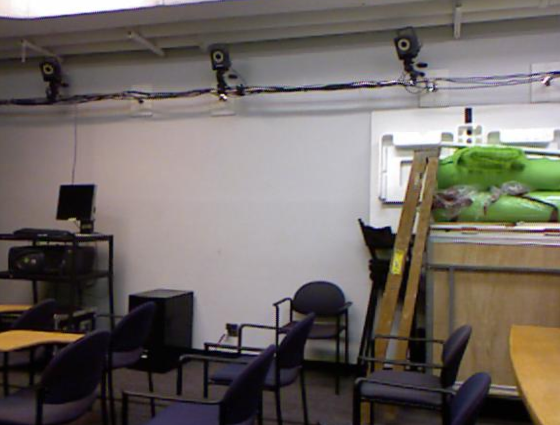

Top 10 Equations for image_id 'image6':
15     what is in front of the stacked chairs and on ...
16      how many dark blue armchairs are in this picture
17                       what is in front of the monitor
18     what color is the chair in front of the wall o...
527                            how many chairs are there
624                            how many chairs are there
625    what is the object placed close to the floor t...
626    what is the object that is placed on the middl...
627    what are the two long objects that are rested ...
628    what are the objects that are placed on the sh...
Name: question, dtype: object


In [129]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Dataset/data_train.csv')


import IPython.display as display

image_path = "Dataset/images/image6.png"

# Extract image_id from the image_path
image_id = image_path.split('/')[-1].split('.')[0]
image = Image.open(image_path)
display.display(image)

# User input for the image_id
user_input = image_id

# Filter the data based on the user input
filtered_data = df[df['image_id'] == image_id].head(10)

# Get the top 10 equations
top_10_equations = filtered_data['question']

# Print the top 10 equations
print("Top 10 Equations for image_id '{}':".format(user_input))
print(top_10_equations)


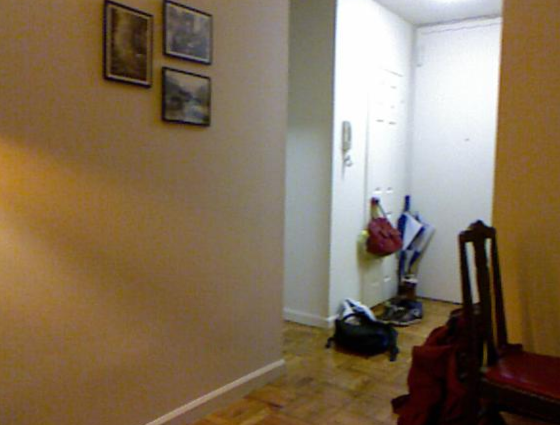

what is on the wall to the left of the door
what is near the backpack
what is at the corner of the wall near the door
what is in front of of the door
how many pictures are on the wall
what is the red object hanged on the white wall nest to the umbrella
what is the object close to the wall on the left side of the door
what are the objects on the floor in front of the door
what is the largest object
how many wall decorations are there


In [130]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import IPython.display as display



# Function to calculate cosine similarity
def calculate_cosine_similarity(query, documents):
    vectorizer = CountVectorizer().fit_transform([query] + documents)
    vectors = vectorizer.toarray()
    similarity_matrix = cosine_similarity(vectors)
    return similarity_matrix[0][1:]

# Function to get top K similar equations using KNN
def get_top_k_equations(query, equations, k=10):
    cosine_similarities = calculate_cosine_similarity(query, equations)
    indices = cosine_similarities.argsort()[-k:][::-1]
    return indices

# Image path
image_path = "Dataset/images/image150.png"

# Extract image_id from the image_path
image_id = image_path.split('/')[-1].split('.')[0]
image = Image.open(image_path)
display.display(image)

# User input for the image_id
user_input = image_id

# Filter the data based on the user input
filtered_data = df[df['image_id'] == user_input]

# Get all equations for the given image
all_equations = filtered_data['question'].tolist()

# Get the top 10 equations using cosine similarity and KNN
top_10_indices = get_top_k_equations(user_input, all_equations, k=10)

# Print the top 10 equation
for index in top_10_indices:
    print(all_equations[index])


In [131]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

# Function to calculate cosine similarity
def calculate_cosine_similarity(query, documents):
    vectorizer = CountVectorizer().fit_transform([query] + documents)
    vectors = vectorizer.toarray()
    similarity_matrix = cosine_similarity(vectors)
    return similarity_matrix[0][1:]

# Function to get top K similar equations using KNN
def get_top_k_equations(query, equations, k=10):
    cosine_similarities = calculate_cosine_similarity(query, equations)
    indices = cosine_similarities.argsort()[-k:][::-1]
    return indices

# Function to handle the image upload button
def upload_image():
    file_path = filedialog.askopenfilename(title="Select Image", filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])
    if file_path:
        image_path.set(file_path)
        display_image(file_path)

# Function to display the uploaded image
def display_image(path):
    image = Image.open(path)
    image.thumbnail((300, 300))  # Resize the image for display
    photo = ImageTk.PhotoImage(image)
    image_label.config(image=photo)
    image_label.image = photo

# Function to get and display equations
def get_and_display_equations():
    user_input = image_path.get()
    if user_input:
        df = pd.read_csv('Dataset/data_train.csv')
        print(user_input)
        import os
        name_without_extension = os.path.splitext(user_input)[0]  # Remove the file extension
        desired_content = name_without_extension.split("/")[-1]
        print(desired_content)
        # Filter the data based on the user input
        filtered_data = df[df['image_id'] == desired_content]

        # Get all equations for the given image
        all_equations = filtered_data['question'].tolist()

        # Get the top 10 equations using cosine similarity and KNN
        top_10_indices = get_top_k_equations(user_input, all_equations, k=10)
        print(top_10_indices)
        

        # # Display the top 10 equations
        result_text.config(state=tk.NORMAL)
        result_text.delete(1.0, tk.END)
        for index in top_10_indices:
            result_text.insert(tk.END, all_equations[index] + '\n')
        result_text.config(state=tk.DISABLED)

# GUI setup
root = tk.Tk()
root.title("Equation Recommendation System")

# Image path variable
image_path = tk.StringVar()

# Upload image button
upload_button = tk.Button(root, text="Upload Image", command=upload_image)
upload_button.pack(pady=10)

# Image display label
image_label = tk.Label(root)
image_label.pack(pady=10)

# Get and display equations button
get_equations_button = tk.Button(root, text="Get Questions", command=get_and_display_equations)
get_equations_button.pack(pady=10)

# Result text box
result_text = tk.Text(root, height=10, width=50, state=tk.DISABLED)
result_text.pack(pady=10)

# Run the GUI
root.mainloop()


C:/Users/reddi/OneDrive/Desktop/python/image Qua/image/image1059.png
image1059
[6 5 4 3 2 1 0]
C:/Users/reddi/OneDrive/Desktop/python/image Qua/image/image1017.png
image1017
[7 6 5 4 3 2 1 0]
C:/Users/reddi/OneDrive/Desktop/python/image Qua/image/image1045.png
image1045
[5 4 3 2 1 0]
